# Learning Curves

### Introduction
While many individuals are familiar with loss curves, a lesser-known yet equally valuable counterpart is the learning curve. Unlike loss curves that typically depict the evolution of loss or score over epochs, learning curves showcase the relationship between performance metrics and the size of the available data.

Learning curves offer insights into how a model responds to an incremental increase in the volume of data it is exposed to. By plotting the loss or score on both the training and testing data against the dataset size, learning curves serve several important purposes:
- **Data Driven Development:** Learning curves inform us about the potential benefits of adding new data to the training set. By observing how the model's performance evolves with increasing data size, we can gauge whether additional data is likely to enhance the model's generalization
- **Bias-Variance Tradeoff:** Unlike models with an iterative training procedure, such as neural networks that use multiple epochs, learning curves provide a snapshot of the bias/variance tradeoff without the need for iterative training. This insight is crucial for understanding how well the model generalizes to unseen data and whether it is exhibiting signs of underfitting or overfitting

### Demo
Let's try to classify a scaled down version of MNIST. These are 8x8 images of hand drawn digits.

In [41]:
# Imports
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve, validation_curve
import matplotlib.pyplot as plt
import numpy as np

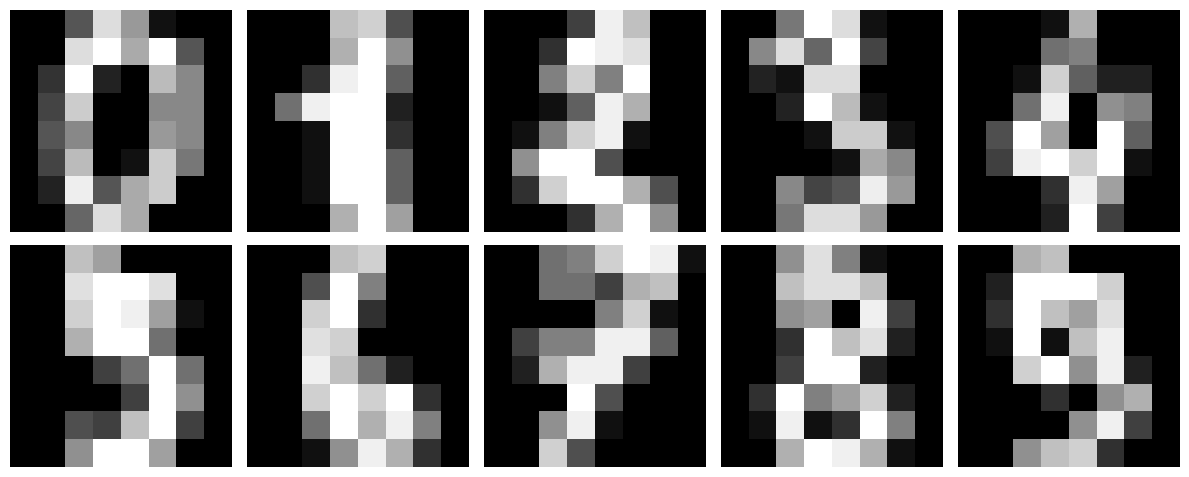

In [42]:
# Load the data
X, y = load_digits(return_X_y=True)

# Plot some examples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(10):
    image = X[i].reshape(8, 8)
    row_index = i // 5
    col_index = i % 5
    axes[row_index, col_index].imshow(image, cmap='gray')
    axes[row_index, col_index].axis('off')
plt.tight_layout()
plt.show()

### Case 1
For our first model, let's try a decision tree classifier with max depth of 1. As this is an extremely simple model, we might expect the performance to be poor, but how so? Let's plot a learning curve to find out.

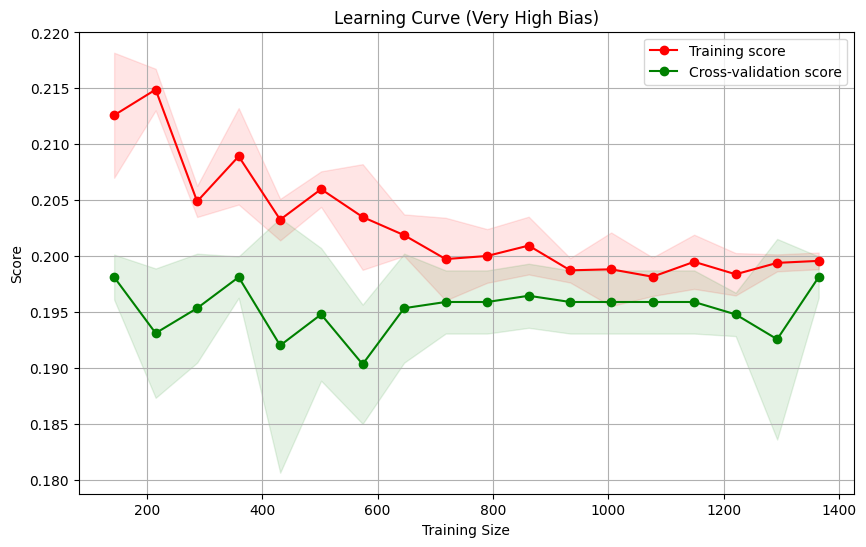

In [43]:
# Choose classifier
clf = DecisionTreeClassifier(max_depth=1)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y, train_sizes=np.arange(0.1, 1, 0.05), scoring='accuracy'
)

# Calculate mean and standard deviation of scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve (Very High Bias)")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

Looking at the learning curve, there are a few things to note:
- Our training and validation scores have converged
- ...but they converged to a very low score

This is indicative of underfitting (or low variance, high bias). Adding more training data will not help our model. In this case, we should look to use a more complex, expressive model.


### Case 2
Next, let's try a support vector classifier. This is much more expressive than a single layer decision tree, so we expect it to perform better. Let's analyze its learning curve.

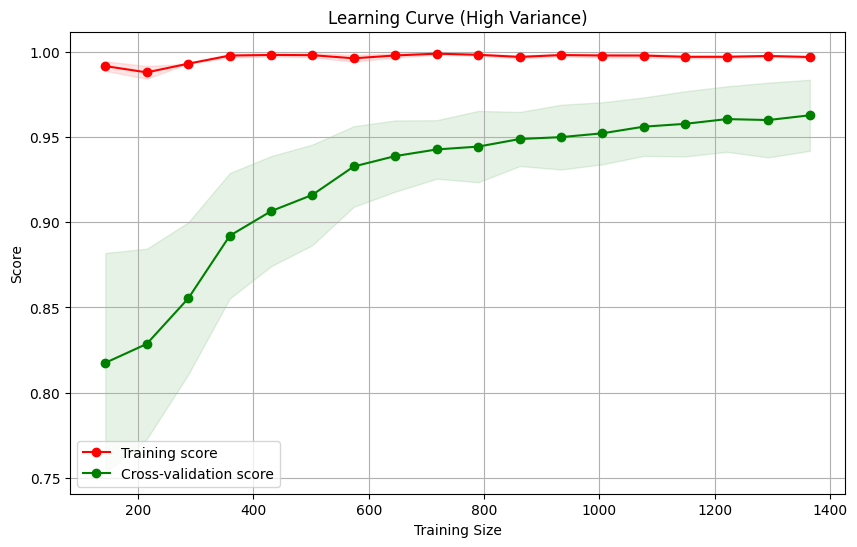

In [44]:
# Choose classifier
clf = SVC()

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y, train_sizes=np.arange(0.1, 1, 0.05), scoring='accuracy'
)

# Calculate mean and standard deviation of scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve (High Variance)")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

Looking at the learning curve of the SVC, we note the following:
- Our validation score is much higher
- But, there is a bit of a gap between the training and validation scores

Here, we see the SVC performed much better than the single layer decision tree. However, we see that the training and validation curves haven't quite converged to one another yet. This is indicative of slight overfitting (low bias, high variance). The validation curve seems to still be increasing at the maximum amount of available data. Hence, if we were to add more data, we'd likey see an increase in performance.

### Case 3
Note that it is possible to have both problems (high bias, high variance). Let's look at how a Gaussian Naive Bayes classifier performs.

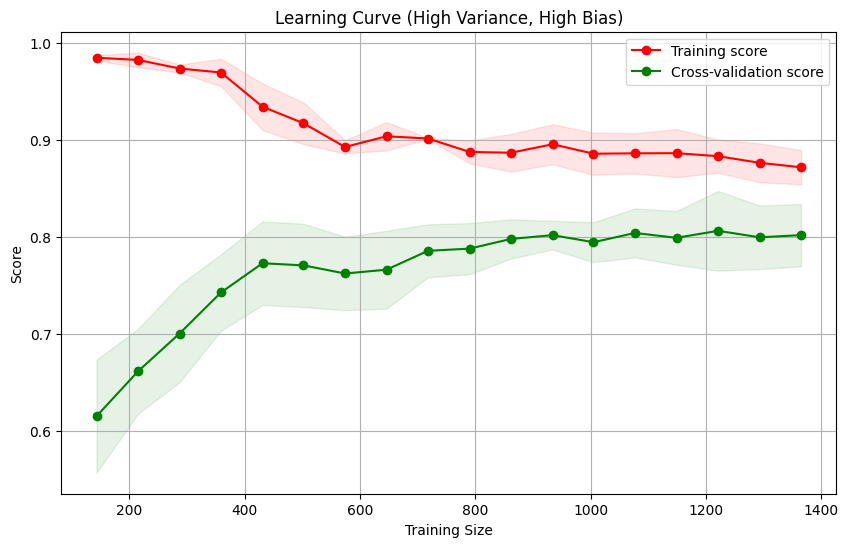

In [45]:
# Choose classifier
clf = GaussianNB()

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y, train_sizes=np.arange(0.1, 1, 0.05), scoring='accuracy'
)

# Calculate mean and standard deviation of scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve (High Variance, High Bias)")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

In this case, we see a bit of both problems:
- Our curves aren't quite at convergence
- The score is lower than our desired performance

This is indicative of a (slight) high bias AND high variance problem. We may look to use a more expressive model to first lower the bias, and then add more data as we need to lower the variance.